In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [46]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\PRO\data\heart_disease_uci.csv')

# Data inspection

In [47]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [48]:
# Data Info
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [49]:
print("\nMissing Data per column:")
print(df.isnull().sum())


Missing Data per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [50]:
df.select_dtypes(include='number').columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [51]:
print(df.select_dtypes(include = ['object']).columns)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [52]:
# Check percentage for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(f"\nPercentage of missing values per column:\n{missing_percentage}")



Percentage of missing values per column:
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [53]:
# Check percentage for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
for column, percentage in missing_percentage.items():
    print(f"{column}: {percentage:.3f}%")


Percentage of missing values per column:
id: 0.000%
age: 0.000%
sex: 0.000%
dataset: 0.000%
cp: 0.000%
trestbps: 6.413%
chol: 3.261%
fbs: 9.783%
restecg: 0.217%
thalch: 5.978%
exang: 5.978%
oldpeak: 6.739%
slope: 33.587%
ca: 66.413%
thal: 52.826%
num: 0.000%


# Handle missing values

In [54]:
# Drop the 'id', 'dataset column and columns with a high percentage of missing values
df_cleaned = df.drop(columns = ['id', 'dataset', 'ca', 'thal', 'slope'])

In [55]:
# Impute missing values for numerical columns
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
  df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].mean())

In [56]:
# Impute missing values for categorical columns
cat_cols = ['fbs', 'restecg', 'exang']
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


In [57]:
# display data after imputation
print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


In [58]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,0
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,2
2,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,1
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,0
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,1
916,62,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,0
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,2
918,58,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,0


Data encoding

In [59]:
# convert the target variable to a binary format
df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)

In [60]:
# encode binary categorical comlumns
df_cleaned['sex'] = df_cleaned['sex'].map({'Male': 1, 'Female': 0, 1: 1, 0: 0})
df_cleaned['fbs'] = df_cleaned['fbs'].map({'True': 1, 'False':0, 1: 1, 0: 0})
df_cleaned['exang'] = df_cleaned['exang'].map({'True': 1, 'False': 0, 1: 1, 0: 0})

In [61]:
df_cleaned['cp'] = df_cleaned['cp'].map({'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3})
df_cleaned['restecg'] = df_cleaned['restecg'].map({'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2})

In [62]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,0,145.000000,233.0,1,2,150.000000,0,2.300000,0
1,67,1,3,160.000000,286.0,0,2,108.000000,1,1.500000,1
2,67,1,3,120.000000,229.0,0,2,129.000000,1,2.600000,1
3,37,1,2,130.000000,250.0,0,0,187.000000,0,3.500000,0
4,41,0,1,130.000000,204.0,0,2,172.000000,0,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3,127.000000,333.0,1,1,154.000000,0,0.000000,1
916,62,1,0,132.132404,139.0,0,1,137.545665,0,0.878788,0
917,55,1,3,122.000000,223.0,1,1,100.000000,0,0.000000,1
918,58,1,3,132.132404,385.0,1,2,137.545665,0,0.878788,0


In [63]:
# Display the final preprocessed data
df_final = df_cleaned
print("\nFinal preprocessed Data:")
df_final


Final preprocessed Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,0,145.000000,233.0,1,2,150.000000,0,2.300000,0
1,67,1,3,160.000000,286.0,0,2,108.000000,1,1.500000,1
2,67,1,3,120.000000,229.0,0,2,129.000000,1,2.600000,1
3,37,1,2,130.000000,250.0,0,0,187.000000,0,3.500000,0
4,41,0,1,130.000000,204.0,0,2,172.000000,0,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3,127.000000,333.0,1,1,154.000000,0,0.000000,1
916,62,1,0,132.132404,139.0,0,1,137.545665,0,0.878788,0
917,55,1,3,122.000000,223.0,1,1,100.000000,0,0.000000,1
918,58,1,3,132.132404,385.0,1,2,137.545665,0,0.878788,0


In [64]:
# convert data types to integers
df_final['trestbps'] = df_final['trestbps'].astype(int)
df_final['chol'] = df_final['chol'].astype(int)
df_final['thalch'] = df_final['thalch'].astype(int)
df_final['oldpeak'] = df_final['oldpeak'].astype(int)

In [65]:
df_final.dtypes

age         int64
sex         int64
cp          int64
trestbps    int32
chol        int32
fbs         int64
restecg     int64
thalch      int32
exang       int64
oldpeak     int32
num         int64
dtype: object

In [66]:
# save cleaned data to csv
df_final.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to cleaned_data.csv")

Cleaned data saved to cleaned_data.csv


# Exploratory Data Analysis ( EDA )
 - Visualize distributions, correlations, and relationships

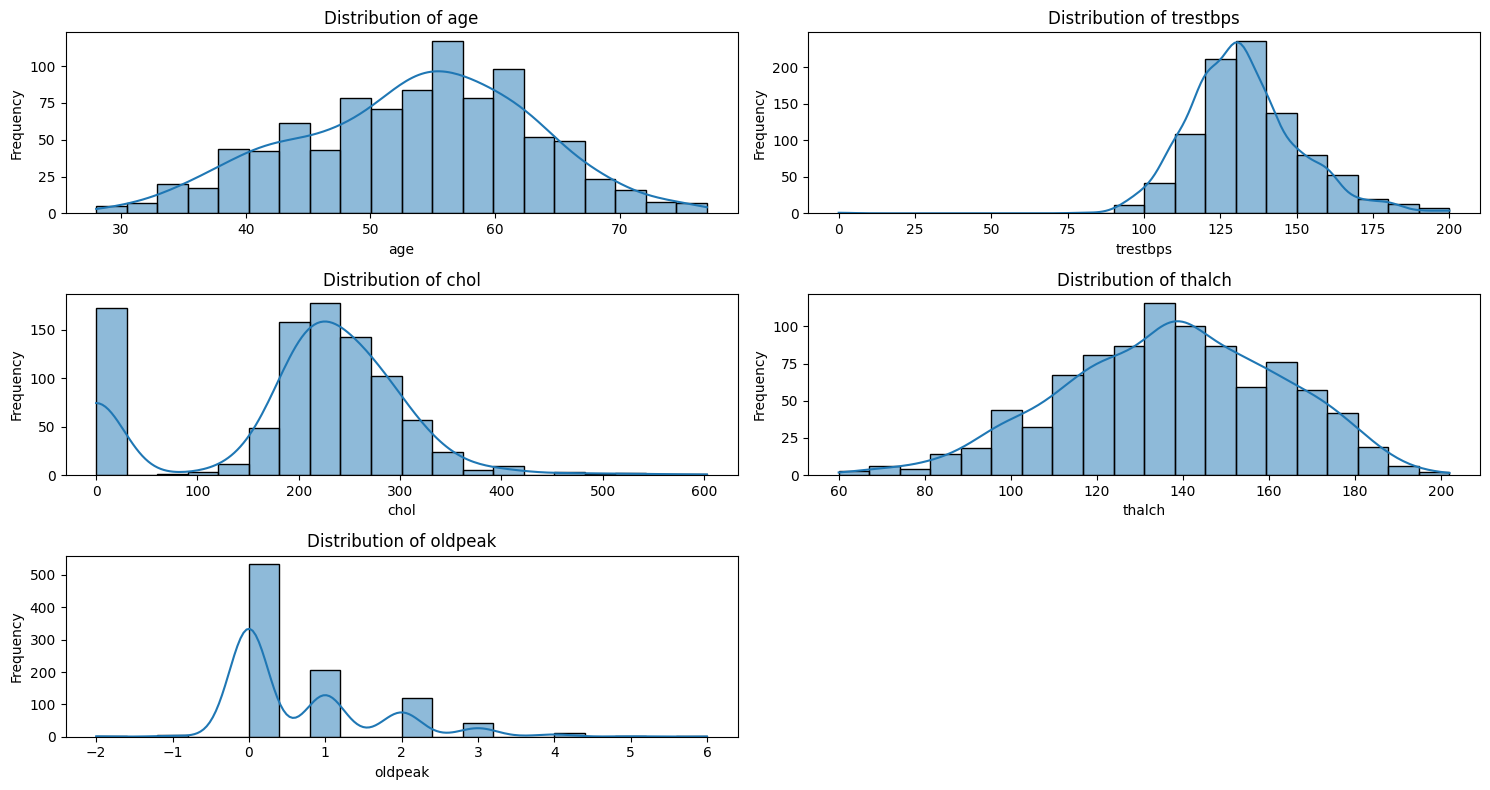

In [67]:
# Numerical features
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize = (15, 8))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(3, 2, i)
  sns.histplot(df_final[col], bins = 20, kde = True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

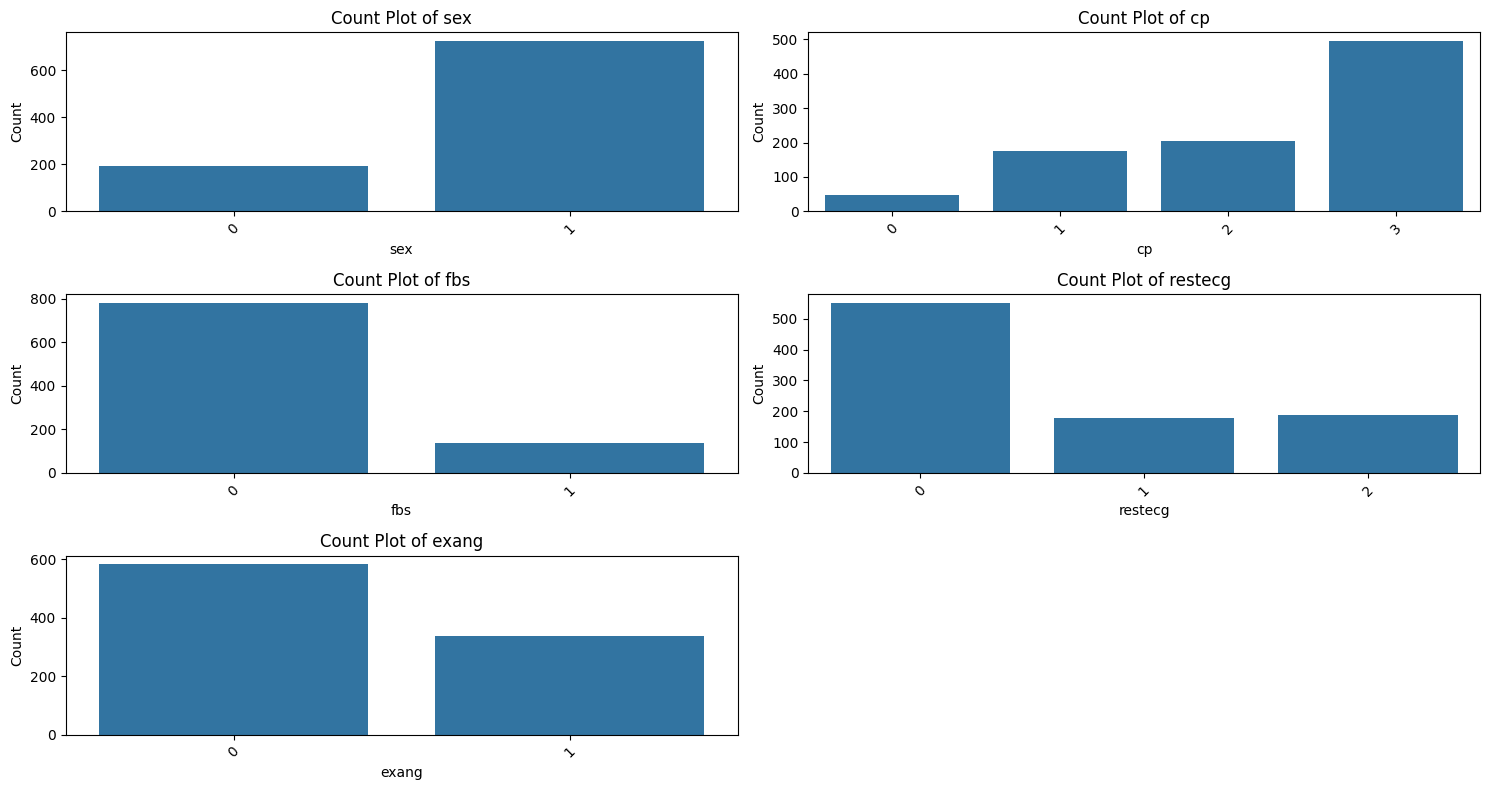

In [68]:
# categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']

# count plots
plt.figure(figsize = (15, 8))
for i, col in enumerate(categorical_cols, 1):
  plt.subplot(3, 2, i)
  sns.countplot(x = df_final[col])
  plt.title(f'Count Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

  - Target Distribution

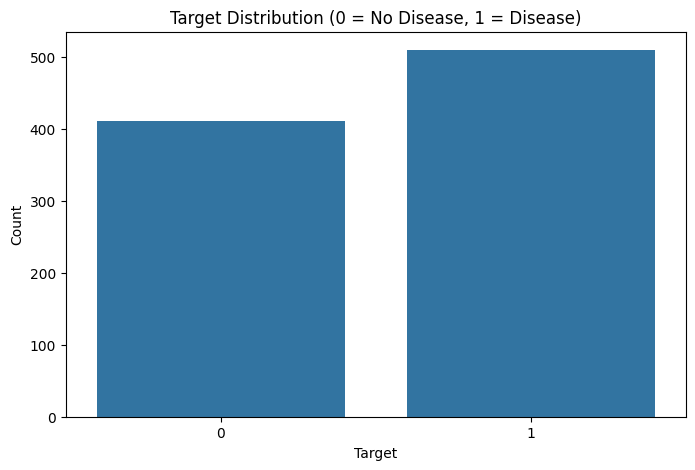

num
1    509
0    411
Name: count, dtype: int64


In [69]:
# Target Distribution
plt.figure(figsize = (8, 5))
sns.countplot(x  = df_final['num'])
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
print(df_cleaned['num'].value_counts())

- Correlations - corr matrix, numerical features

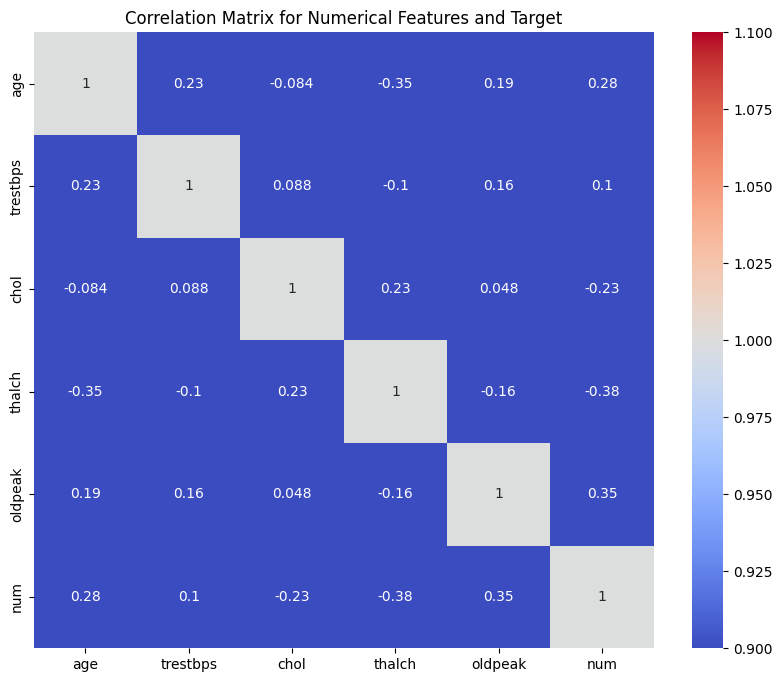

In [70]:
# correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(df_final[numeric_cols + ['num']].corr(), annot = True, cmap = 'coolwarm', vmin=1, vmax=1)
plt.title('Correlation Matrix for Numerical Features and Target')
plt.show()

  - Relationships with Target
     - Numerical features vs Target

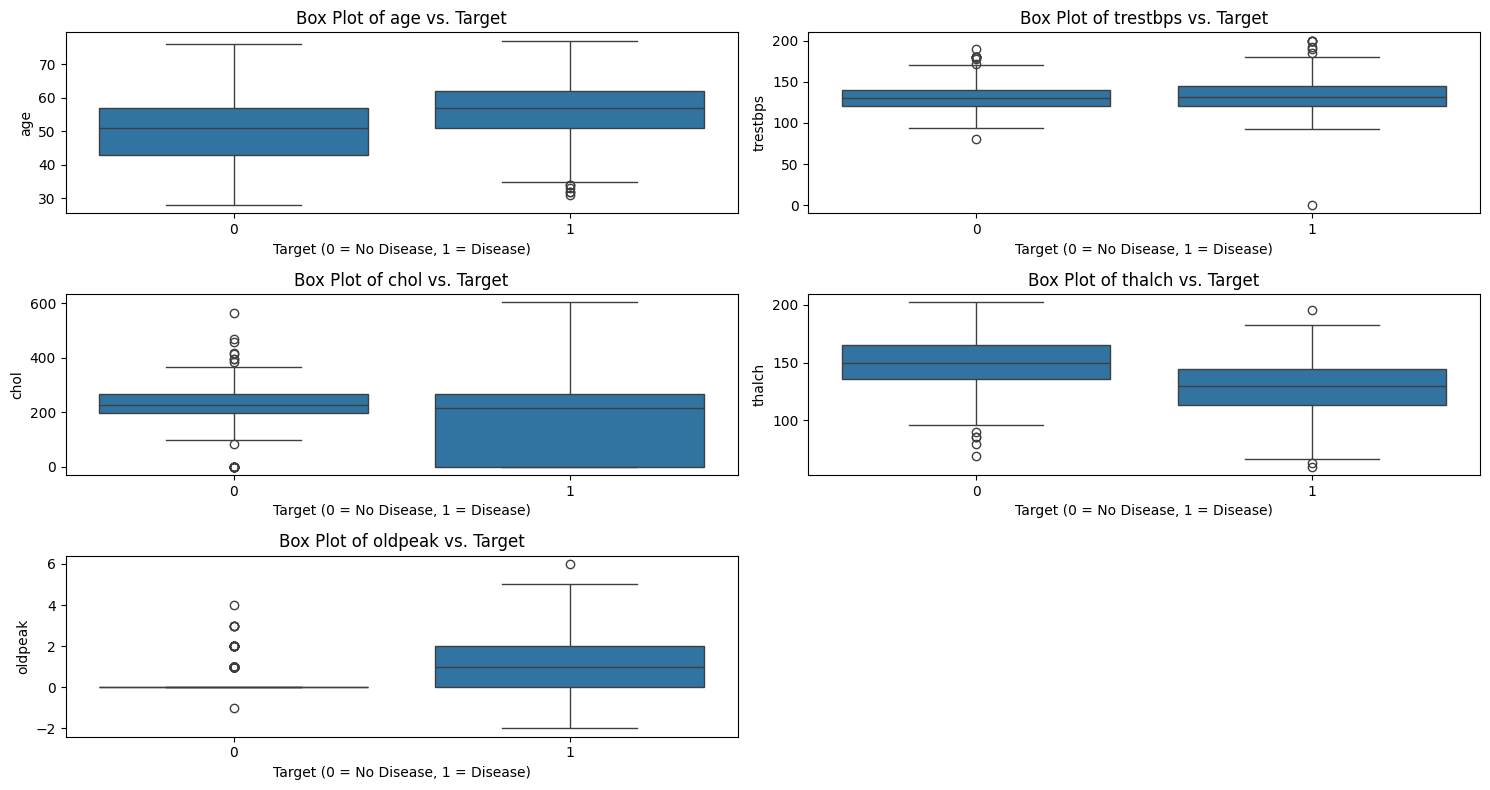

In [71]:
# Box plots for numerical features vs num
plt.figure(figsize = (15, 8))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(3, 2, i)
  sns.boxplot(x = df_final['num'], y = df_final[col])
  plt.title(f'Box Plot of {col} vs. Target')
  plt.xlabel('Target (0 = No Disease, 1 = Disease)')
  plt.ylabel(col)
plt.tight_layout()
plt.show()

- Categorical features vs Target



<Figure size 1500x1200 with 0 Axes>

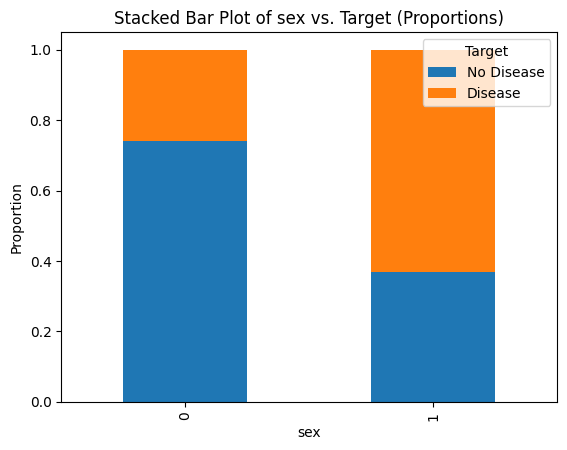

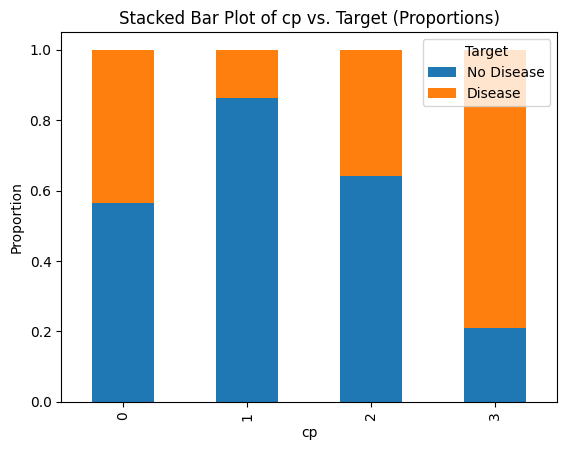

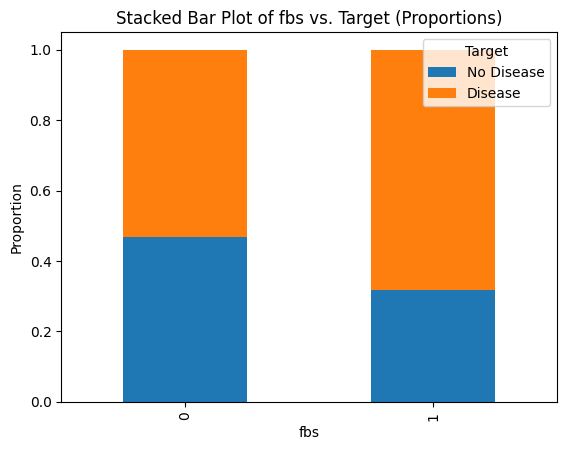

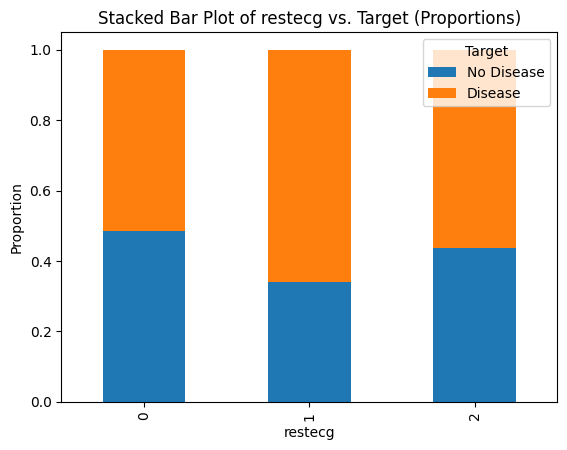

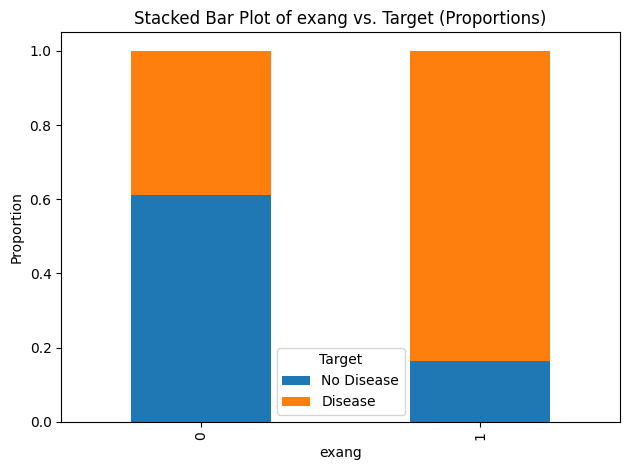

In [72]:
# stacked bar plots for Categorical features vs Target
plt.figure(figsize = (15, 12))
for i, col in enumerate(categorical_cols, 1):

  pd.crosstab(df_final[col], df_final['num'], normalize = 'index').plot(kind = 'bar', stacked = True, )
  plt.title(f'Stacked Bar Plot of {col} vs. Target (Proportions)')
  plt.xlabel(col)
  plt.ylabel('Proportion')
  plt.legend(title = 'Target', labels = ['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

- Additional relationships ( feature interactions )

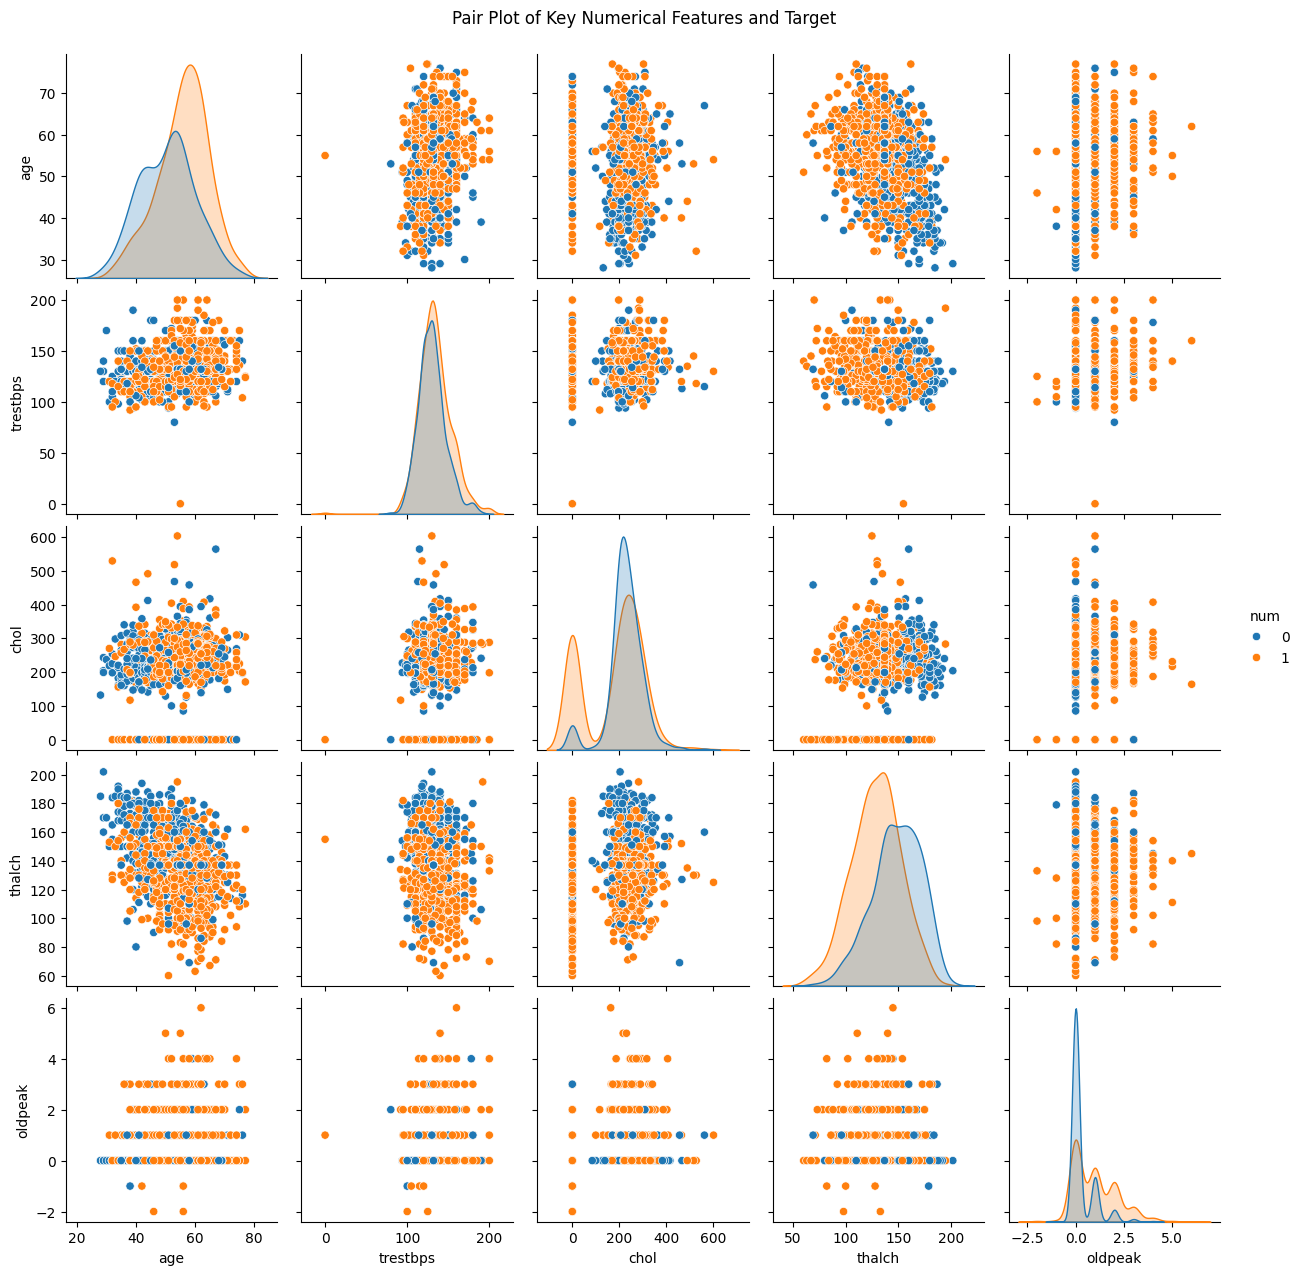

In [73]:
# pair plot for key numerical features
sns.pairplot(df_final[numeric_cols + ['num']], hue = 'num')
plt.suptitle('Pair Plot of Key Numerical Features and Target', y = 1.02)
plt.show()

# Statistical Tests

  - Chi-Square Test for Categorical Features
    - Test if categorical features are significantly associated with the target ( ssignificant if p < 0.05 )

In [74]:

import scipy.stats as stats
from scipy.stats import chi2_contingency
# categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']

#chi-square test
print("\nChi-Square Test for Categorical Features:")
for col in categorical_cols:
  contigency_table = pd.crosstab(df_final[col], df_final['num'])
  chi2, p, dof, expected = chi2_contingency(contigency_table)
  print(f"{col}: p-value = {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")



Chi-Square Test for Categorical Features:
sex: p-value = 0.0000 (significant)
cp: p-value = 0.0000 (significant)
fbs: p-value = 0.0014 (significant)
restecg: p-value = 0.0033 (significant)
exang: p-value = 0.0000 (significant)


- T-Tests for Numerical Features
   - Test if the means of numerical features differ significantly btn target classes

In [75]:
from scipy.stats import ttest_ind

# Numerical features
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

#T-test
print("\nT-Test Results (p-values):")
for col in numeric_cols:
  disease0 = df_final[df_final['num'] == 0][col]
  disease1 = df_final[df_final['num'] == 1][col]
  t_stat, p = ttest_ind(disease0, disease1, equal_var=False)
  print(f"{col}: p-value = {p:.4f} {'(significant)' if p < 0.05 else '(not significant)'}")


T-Test Results (p-values):
age: p-value = 0.0000 (significant)
trestbps: p-value = 0.0015 (significant)
chol: p-value = 0.0000 (significant)
thalch: p-value = 0.0000 (significant)
oldpeak: p-value = 0.0000 (significant)


# Model Building

In [76]:
# define features
X = df_final.drop(columns = ['num'])
Y = df_final['num']

In [77]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,1,0,145,233,1,2,150,0,2
1,67,1,3,160,286,0,2,108,1,1
2,67,1,3,120,229,0,2,129,1,2
3,37,1,2,130,250,0,0,187,0,3
4,41,0,1,130,204,0,2,172,0,1
...,...,...,...,...,...,...,...,...,...,...
915,54,0,3,127,333,1,1,154,0,0
916,62,1,0,132,139,0,1,137,0,0
917,55,1,3,122,223,1,1,100,0,0
918,58,1,3,132,385,1,2,137,0,0


In [78]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of Y:", Y.shape)

Shape of X_scaled: (920, 10)
Shape of Y: (920,)


In [80]:
# Data spliting
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# split train+val  into train and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (588, 10)
Shape of X_val: (148, 10)
Shape of X_test: (184, 10)


# Model training

In [81]:
#initialize and train the model

model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model.fit(X_train, Y_train)

# print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.31420746]
Coefficients: [[ 0.27637768  0.61896693  0.71659826  0.09275314 -0.50528996  0.23536024
   0.06396353 -0.19833704  0.41687799  0.77193543]]


# Model evaluation

In [82]:
# predict on validation set
y_pred_val = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

In [83]:
# calculate the metrics
accuracy = accuracy_score(Y_val, y_pred_val)
precision = precision_score(Y_val, y_pred_val)
recall = recall_score(Y_val, y_pred_val)
f1 = f1_score(Y_val, y_pred_val)
roc_auc = roc_auc_score(Y_val, y_val_proba)
confusion_mat = confusion_matrix(Y_val, y_pred_val)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8040540540540541
Precision: 0.8072289156626506
Recall: 0.8375
F1 Score: 0.8220858895705521
ROC AUC: 0.8999999999999999
Confusion Matrix:
 [[52 16]
 [13 67]]


# Hyperameter tuning

In [84]:
from sklearn.model_selection import GridSearchCV

# define parameter grid

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#perform grid search
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best F1-Score: 0.7975807619875417


In [85]:
# retrain the model ith the best parameters
model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

# Test the model

In [86]:
# predict on test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# calculate the metrics
print("\nTest Set Metrics:")
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Test Precision:", precision_score(Y_test, y_test_pred))
print("Test Recall:", recall_score(Y_test, y_test_pred))
print("Test F1 Score:", f1_score(Y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(Y_test, y_test_proba))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, y_test_pred))


Test Set Metrics:
Test Accuracy: 0.7880434782608695
Test Precision: 0.8431372549019608
Test Recall: 0.7889908256880734
Test F1 Score: 0.8151658767772513
Test ROC AUC: 0.8639755351681958
Test Confusion Matrix:
 [[59 16]
 [23 86]]


In [87]:
# model deployment

In [88]:
import joblib

# save the model and scaler
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']